In [1]:
import pickle
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from tqdm import tqdm

In [2]:
def plot_obs_vs_pred_fgw_by_gene_seaborn(
    df_long: pd.DataFrame,
    gene: str,
    cell_type_color: pd.DataFrame,
    *,
    cell_type_col: str = "cell_type",
    gene_col: str = "gene",
    obs_col: str = "obs_expr",
    pred_col: str = "pred_fgw_expr",
    bleeding_flag_col: str = "is_bleeding_excluded",
    figsize=(13, 7),
    alpha=0.75,
    s=28,
):

    d = df_long.loc[
        (df_long[gene_col] == gene) &
        (~df_long[bleeding_flag_col].fillna(False)),
        [cell_type_col, obs_col, pred_col]
    ].copy()

    d = d[np.isfinite(d[obs_col]) & np.isfinite(d[pred_col])]
    if d.empty:
        raise ValueError(f"No valid rows for gene='{gene}' after bleeding exclusion.")


    color_map = (
        cell_type_color[[cell_type_col, "color"]]
        .dropna()
        .drop_duplicates(subset=[cell_type_col], keep="last")
        .set_index(cell_type_col)["color"]
        .to_dict()
    )

    hue_order = list(d[cell_type_col].dropna().unique())

    palette = {ct: color_map.get(ct, "#808080") for ct in hue_order}

    # 3) seaborn scatterplot
    fig, ax = plt.subplots(figsize=figsize)
    sns.scatterplot(
        data=d,
        x=obs_col,
        y=pred_col,
        hue=cell_type_col,
        hue_order=hue_order,
        palette=palette,
        alpha=alpha,
        s=s,
        linewidth=0,
        ax=ax,
    )

    vmin = float(min(d[obs_col].min(), d[pred_col].min()))
    vmax = float(max(d[obs_col].max(), d[pred_col].max()))
    ax.plot([vmin, vmax], [vmin, vmax], linestyle="--", linewidth=1, color="black")

    ax.set_title(f"{gene}: obs_expr vs pred_expr (bleeding excluded)")
    ax.set_xlabel("log(1 + obs_expr)")
    ax.set_ylabel("log(1 + pred_expr)")
    ax.grid(True, alpha=0.2)

    ax.legend(
        title="cell_type",
        bbox_to_anchor=(1.02, 1),
        loc="upper left",
        borderaxespad=0.0,
        frameon=True
    )

    plt.tight_layout()
    return fig, ax, d


# Data Import

In [3]:
cell_color_path = '/local/users/dlee/ST/data/cell_type_colors-2025-11-19.csv'

with open(file='/local/users/dlee/ST/result/Cluster_SC_mapping/predected_expression.pkl', mode='rb') as f:
        proposed_expressed_data=pickle.load(f)
         
with open(file='/local/users/dlee/ST/result/MC_SC_mapping/moscot_predected_expression.pkl', mode='rb') as f:
        moscot_expressed_data=pickle.load(f)
           
with open(file='/local/users/dlee/ST/result/MC_SC_mapping/tangram_predected_expression.pkl', mode='rb') as f:
        tangram_expressed_data=pickle.load(f)

In [5]:
cell_type_color = pd.read_csv(cell_color_path)

In [21]:
moscot_expressed_data.rename(columns={"pred_stage1_expr": "pred_fgw_expr"}, inplace=True)
tangram_expressed_data.rename(columns={"pred_stage1_expr": "pred_fgw_expr"}, inplace=True)

# Run all Genes

In [57]:
for gene_input in tqdm(proposed_expressed_data['gene'].unique()):
    
    fig, ax, d_plot = plot_obs_vs_pred_fgw_by_gene_seaborn(
    df_long=proposed_expressed_data,
    gene=gene_input,
    cell_type_color=cell_type_color
    )


    fig.savefig(
        f"/local/users/dlee/ST/result/Cluster_SC_mapping/proposed_pred_vs_obs_each_gene/{gene_input}.png",
        dpi=300,            
        bbox_inches="tight",  
        transparent=False
    )
    
    plt.close(fig) 
    
    fig, ax, d_plot_2 = plot_obs_vs_pred_fgw_by_gene_seaborn(
        df_long=moscot_expressed_data,
        gene=gene_input,
        cell_type_color=cell_type_color
    )

    fig.savefig(
        f"/local/users/dlee/ST/result/MC_SC_mapping/moscot_pred_vs_obs_each_gene/{gene_input}.png",
        dpi=300,              # 해상도
        bbox_inches="tight",  # 여백 최소화
        transparent=False
    )
    
    plt.close(fig) 
    
    
    fig, ax, d_plot_3 = plot_obs_vs_pred_fgw_by_gene_seaborn(
        df_long=tangram_expressed_data,
        gene=gene_input.lower(),
        cell_type_color=cell_type_color
    )
    
    
    fig.savefig(
        f"/local/users/dlee/ST/result/MC_SC_mapping/tamgram_pred_vs_obs_each_gene/{gene_input}.png",
        dpi=300,              # 해상도
        bbox_inches="tight",  # 여백 최소화
        transparent=False
    )
    
    plt.close(fig) 


    

100%|██████████| 445/445 [35:57<00:00,  4.85s/it]


# Proposed Model

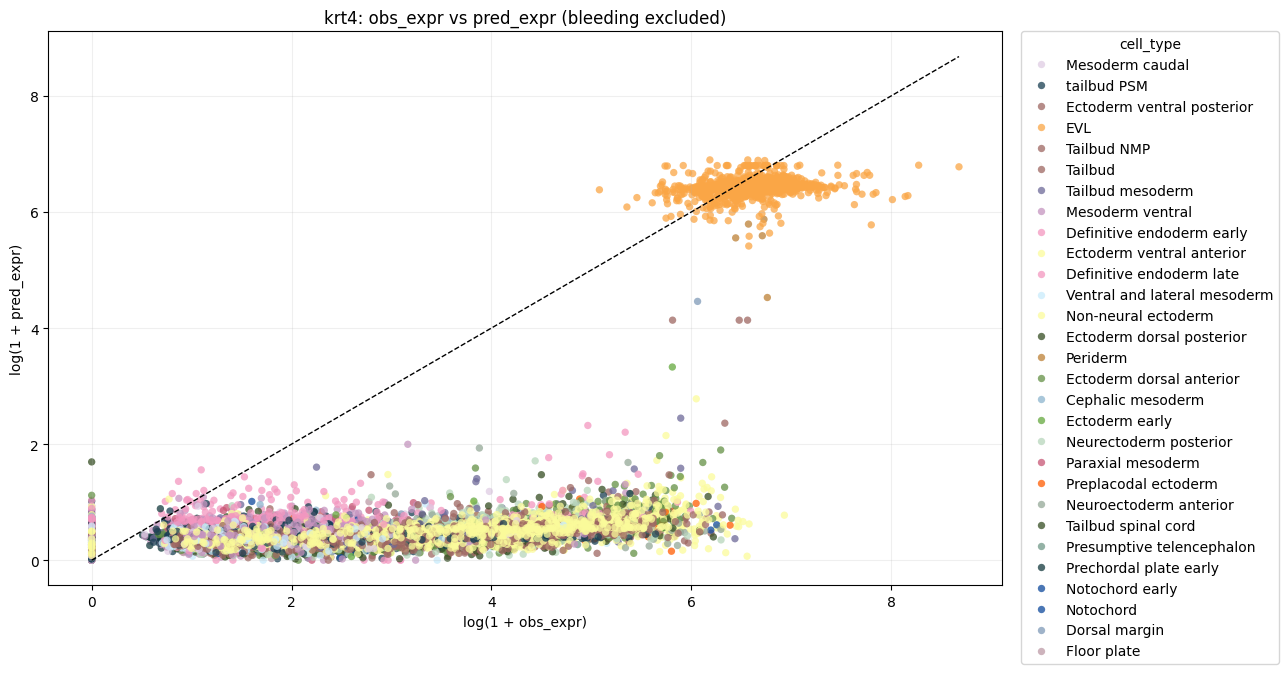

In [6]:
gene_input = "krt4" 

fig, ax, d_plot = plot_obs_vs_pred_fgw_by_gene_seaborn(
    df_long=proposed_expressed_data,
    gene=gene_input,
    cell_type_color=cell_type_color
)


#fig.savefig(
#    f"/local/users/dlee/ST/result/Cluster_SC_mapping/proposed_pred_vs_obs_each_gene/{gene_input}.png",
#    dpi=300,              # 해상도
#    bbox_inches="tight",  # 여백 최소화
#    transparent=False
#)


plt.show()


# Moscot

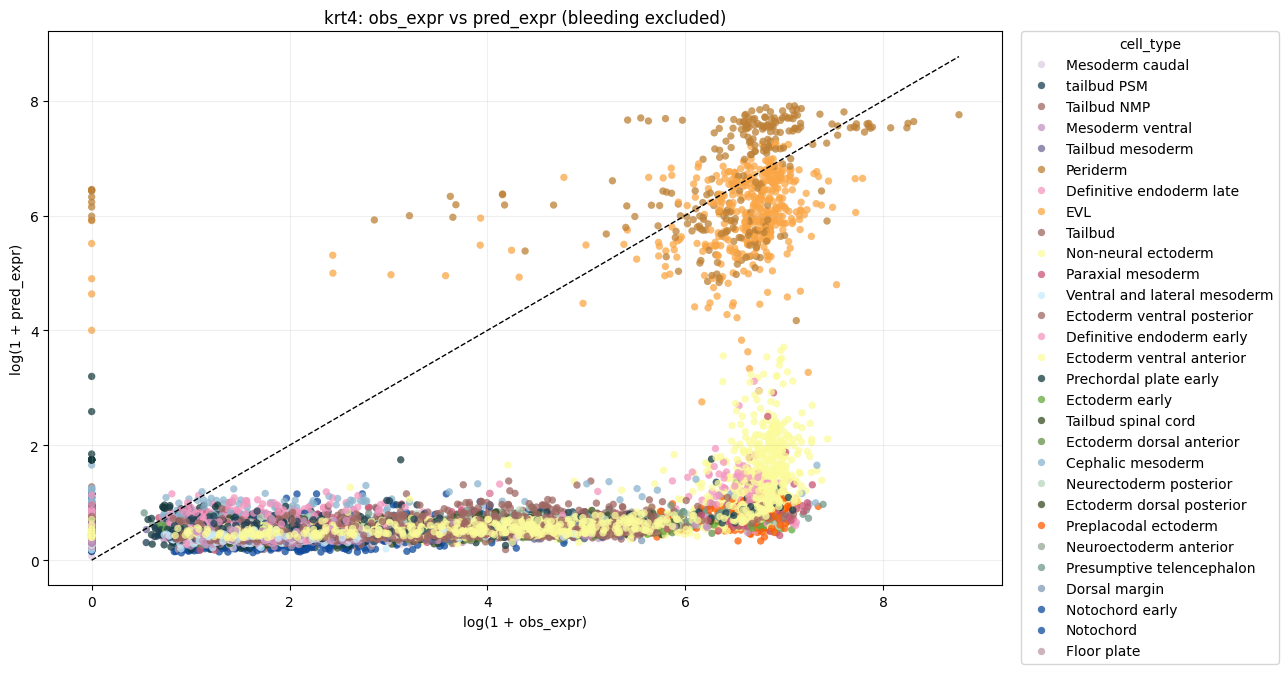

In [24]:
gene_input = "krt4" 

fig, ax, d_plot = plot_obs_vs_pred_fgw_by_gene_seaborn(
    df_long=moscot_expressed_data,
    gene=gene_input,
    cell_type_color=cell_type_color
)
plt.show()

# Tagram

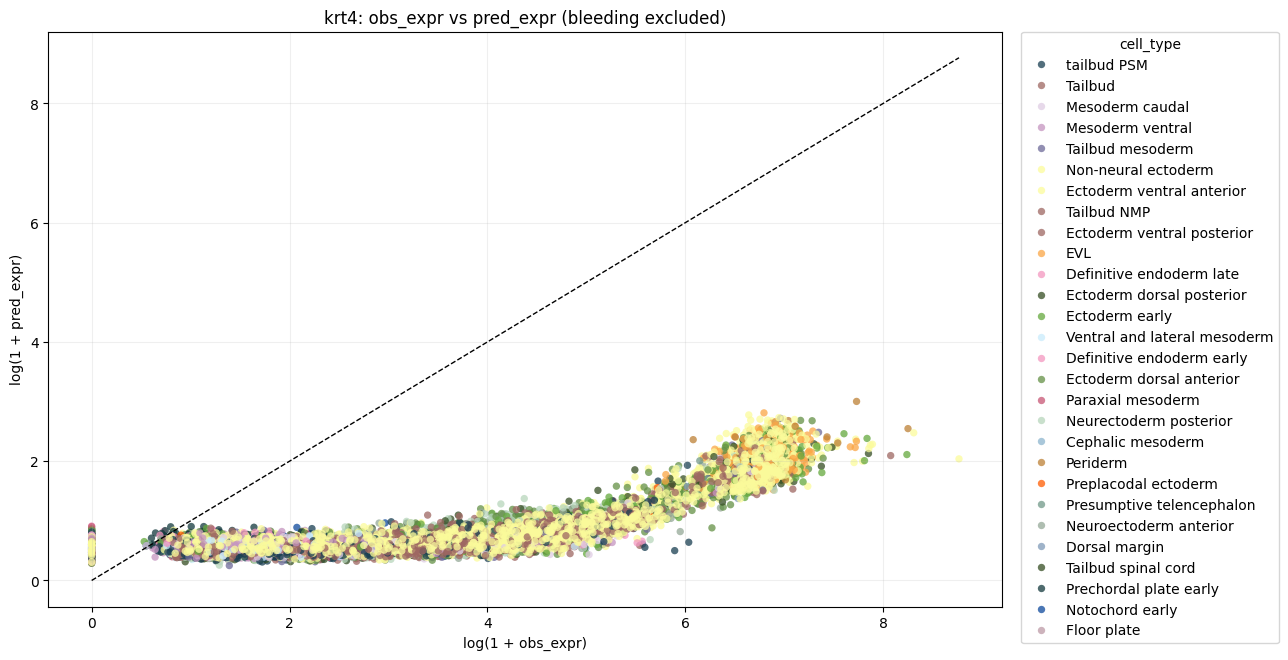

In [26]:
gene_input = "krt4" 

fig, ax, d_plot = plot_obs_vs_pred_fgw_by_gene_seaborn(
    df_long=tangram_expressed_data,
    gene=gene_input,
    cell_type_color=cell_type_color
)
plt.show()